In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame()
df["counts1"] = stats.poisson.rvs(mu=3, size=10000)
df["counts2"] = stats.poisson.rvs(mu=2, size=10000)

In [3]:
df

,counts1,counts2
0,1,1
1,7,3
2,3,3
3,5,1
4,3,1
...,...,...
9995,2,0
9996,5,2
9997,6,3
9998,6,0


In [4]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].value_counts().sort_index(). plot.bar()
    plt.title(f"Histogram of {variable}")
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")
    plt.show()

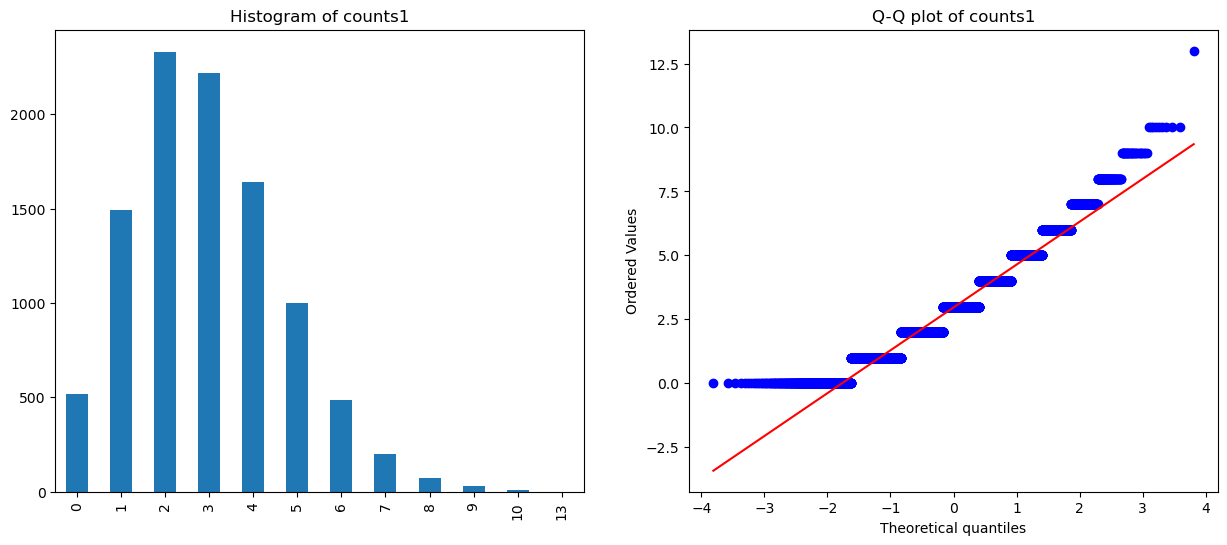

In [5]:
diagnostic_plots(df, "counts1")

In [6]:
df_tf = df.copy()

In [7]:
df_tf[["counts1", "counts2"]] = np.sqrt(
 df[["counts1","counts2"]])

In [8]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.sqrt)

In [63]:
data = pd.read_csv('Train.csv')

In [12]:
data

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
0,ID_4W8AP96UO6,114.798900,3790.450939,28.0,0.427078,6.162365,21.220403,58.492773,63.959387,0.621206,0.521813,24.624612,0.0,1001.533430,27.190843,1
1,ID_UD3TM0ZYND,14.154240,5182.451722,28.0,0.138876,5.399498,0.000000,22.886762,29.508369,0.422183,0.444403,0.044440,0.0,1089.121009,30.150941,0
2,ID_XAG1HC0HWM,0.044444,120.821253,28.0,0.000000,1.577765,0.000000,11.733239,12.888786,0.177776,0.155554,0.044444,0.0,322.464081,28.163287,0
3,ID_CEXD05IR09,31.369916,127228.251100,31.0,0.523750,15.981107,5.356671,602.125436,6976.986795,3.311801,5.756755,5.623394,0.0,12015.169690,34.204404,0
4,ID_X6E97FT8IF,5.046181,1091.620117,25.0,0.069468,1.356022,0.000000,16.138887,13.271234,0.155609,0.133379,0.000000,0.0,550.989619,31.466889,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8903,ID_XJWM9B7X4L,26.769658,6965.281426,25.0,0.155955,1.497184,0.000000,252.525113,589.072219,0.858386,0.758573,0.019962,0.0,1177.825039,30.875026,1
8904,ID_YIC5VRPLUD,0.000000,0.000000,27.0,0.000000,0.400009,0.000000,28.089513,27.267273,0.400009,0.355563,0.000000,0.0,221.249363,23.503856,0
8905,ID_T3RF72SEG1,0.866827,853.957842,29.0,0.000000,4.378587,0.000000,20.559356,26.093712,0.333395,0.355621,0.022226,0.0,262.270699,21.060478,0
8906,ID_2AUQFJYWKV,0.044430,16.527885,28.0,0.000000,0.888596,0.000000,74.375484,116.650437,0.555372,0.377653,0.000000,0.0,268.222697,24.775056,0


In [64]:
data.drop('Label', axis=1, inplace=True)

In [15]:
from feature_engine.transformation import PowerTransformer
root_t = PowerTransformer(exp=1/2)

In [16]:
root_t.fit(data)


PowerTransformer()

In [18]:
df_tf = root_t.transform(data)

In [19]:
df_tf

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius
0,ID_4W8AP96UO6,10.714425,61.566638,5.291503,0.653512,2.482411,4.606561,7.648057,7.997461,0.788166,0.722366,4.962319,0.0,31.647013,5.214484
1,ID_UD3TM0ZYND,3.762212,71.989247,5.291503,0.372661,2.323682,0.000000,4.784011,5.432161,0.649756,0.666636,0.210809,0.0,33.001833,5.490987
2,ID_XAG1HC0HWM,0.210818,10.991872,5.291503,0.000000,1.256091,0.000000,3.425382,3.590095,0.421635,0.394404,0.210818,0.0,17.957285,5.306909
3,ID_CEXD05IR09,5.600885,356.690694,5.567764,0.723705,3.997638,2.314448,24.538244,83.528359,1.819835,2.399324,2.371370,0.0,109.613729,5.848453
4,ID_X6E97FT8IF,2.246371,33.039675,5.000000,0.263569,1.164484,0.000000,4.017323,3.642970,0.394473,0.365211,0.000000,0.0,23.473168,5.609536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8903,ID_XJWM9B7X4L,5.173940,83.458262,5.000000,0.394912,1.223595,0.000000,15.891039,24.270810,0.926491,0.870961,0.141289,0.0,34.319456,5.556530
8904,ID_YIC5VRPLUD,0.000000,0.000000,5.196152,0.000000,0.632463,0.000000,5.299954,5.221807,0.632463,0.596291,0.000000,0.0,14.874453,4.848078
8905,ID_T3RF72SEG1,0.931035,29.222557,5.385165,0.000000,2.092507,0.000000,4.534243,5.108200,0.577404,0.596340,0.149085,0.0,16.194774,4.589170
8906,ID_2AUQFJYWKV,0.210784,4.065450,5.291503,0.000000,0.942654,0.000000,8.624122,10.800483,0.745233,0.614535,0.000000,0.0,16.377506,4.977455


In [22]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f"Histogram of {variable}")
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")
    plt.show()


In [25]:
list(df_tf)

['ID',
 'I/O Data Operations',
 ' I/O Data Bytes',
 'Number of subprocesses',
 'Time on processor',
 'Disk Reading/sec',
 'Disc Writing/sec',
 'Bytes Sent/sent',
 'Received Bytes (HTTP)',
 'Network packets sent',
 'Network packets received',
 'Pages Read/sec',
 'Pages Input/sec',
 'Page Errors/sec',
 'Confirmed byte radius']

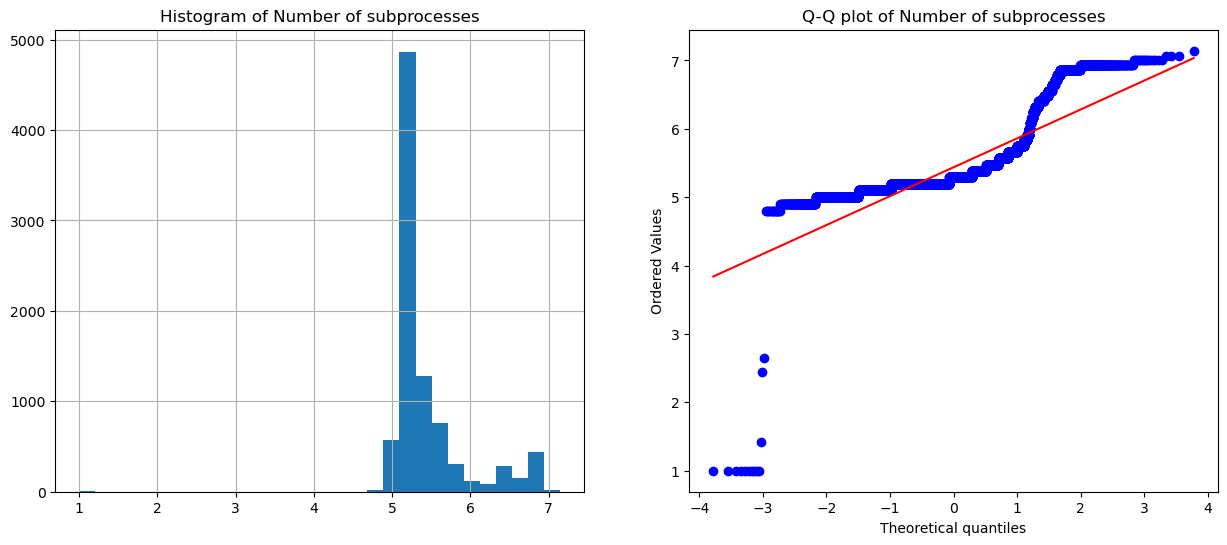

In [30]:
diagnostic_plots(df_tf, 'Number of subprocesses')

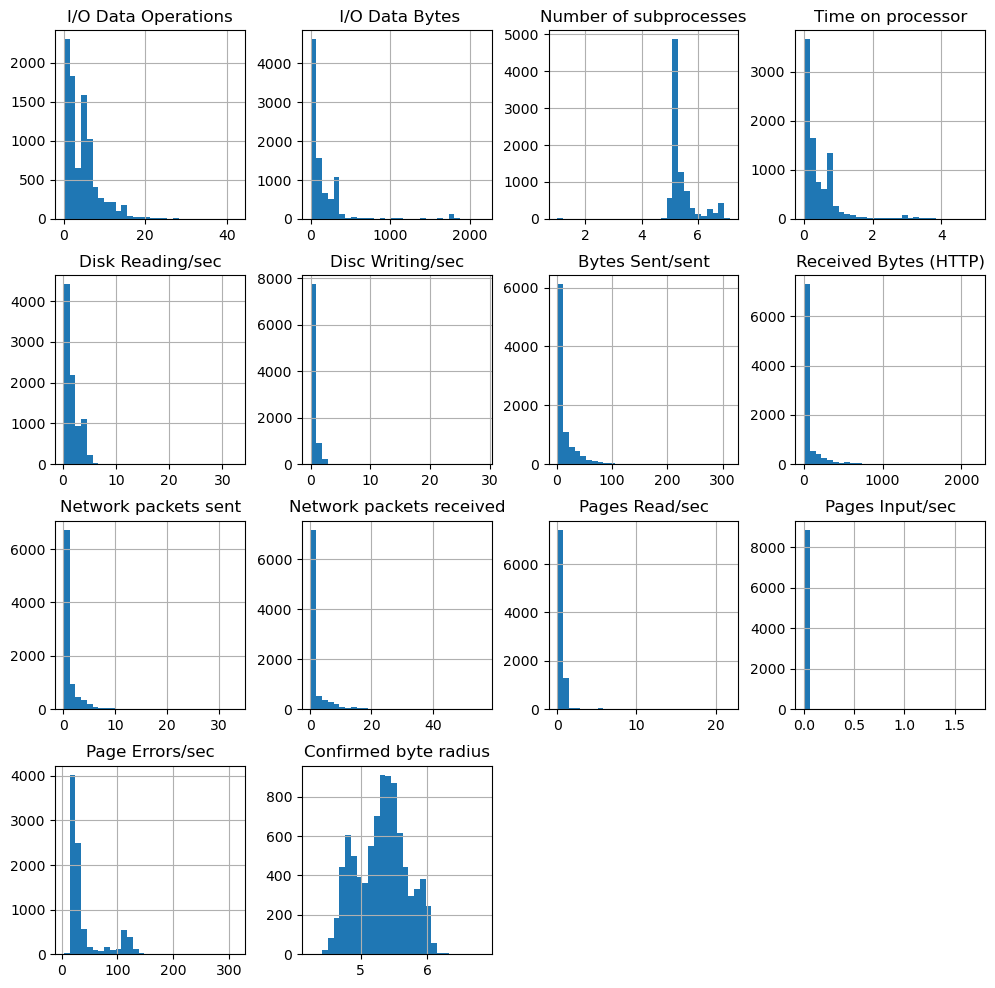

In [31]:
df_tf.hist(bins=30, figsize=(12, 12))
plt.show()

### Using power transformations

In [32]:
from sklearn.preprocessing import FunctionTransformer

In [41]:
transformer = FunctionTransformer(lambda x: np.power(x,0.4))

In [42]:
data_transform = transformer.transform(power)

In [65]:
power = data.drop('ID', axis=1, inplace=True)

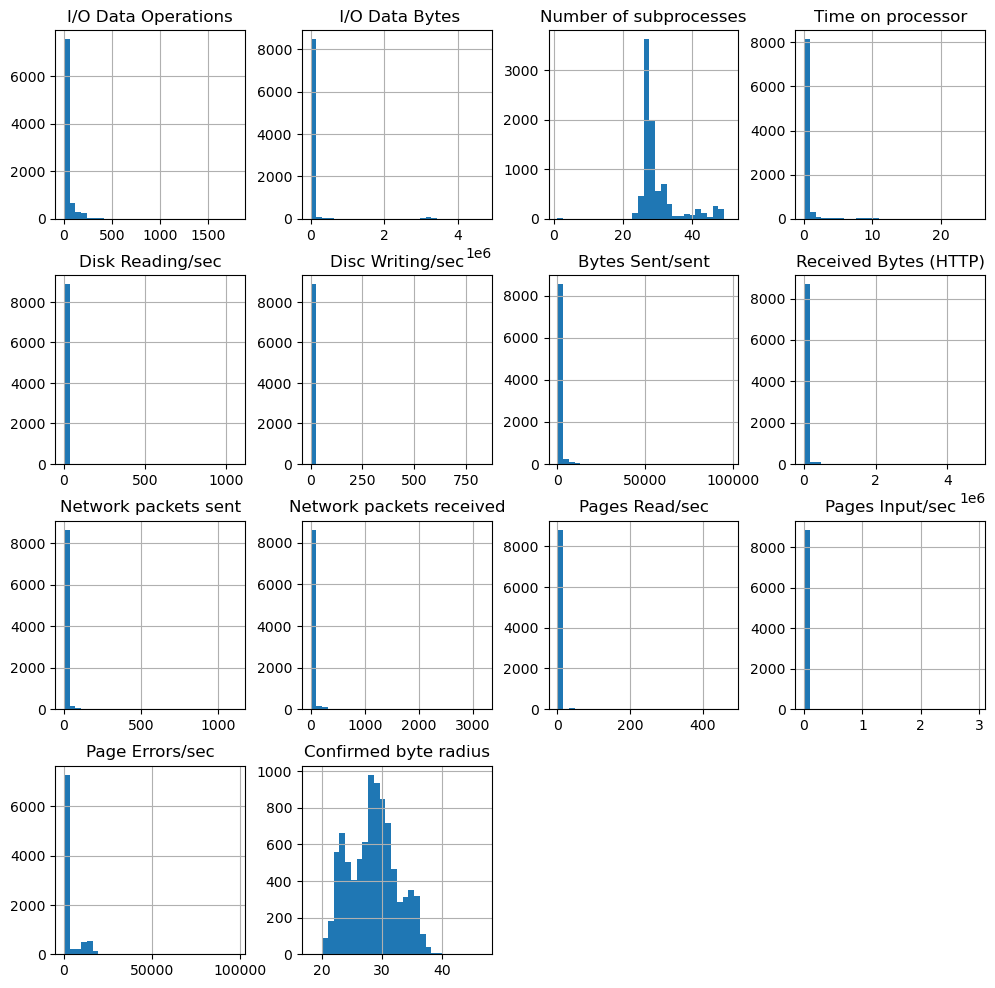

In [43]:
power.hist(bins=30, figsize=(12, 12))
plt.show()

In [39]:
data_transform

,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius
0,4.149362,11.846969,2.717361,0.774733,1.725537,2.500496,3.389461,3.481539,0.866903,0.822725,2.614633,0.0,7.946935,2.693561
1,2.214450,13.012495,2.717361,0.553080,1.658464,0.000000,2.557851,2.760473,0.772059,0.784031,0.392946,0.0,8.149348,2.778371
2,0.392956,4.213500,2.717361,0.000000,1.146602,0.000000,2.093271,2.153097,0.595610,0.572222,0.392956,0.0,5.656456,2.722106
3,2.811603,33.991871,2.801615,0.823639,2.296583,1.654507,6.821912,14.226575,1.432251,1.690648,1.678802,0.0,16.746304,2.885523
4,1.625133,8.154953,2.626528,0.449300,1.095671,0.000000,2.303361,2.172068,0.572283,0.546420,0.000000,0.0,6.642675,2.814208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8903,2.680976,14.219411,2.626528,0.572664,1.128711,0.000000,5.256436,6.777204,0.955223,0.920448,0.309075,0.0,8.343038,2.798222
8904,0.000000,0.000000,2.687875,0.000000,0.759663,0.000000,2.719965,2.695830,0.759663,0.733289,0.000000,0.0,5.052015,2.578349
8905,0.958031,7.575842,2.746119,0.000000,1.557400,0.000000,2.476868,2.660485,0.719263,0.733325,0.319198,0.0,5.316489,2.494827
8906,0.392918,2.319878,2.717361,0.000000,0.965187,0.000000,3.642746,4.169327,0.838253,0.746669,0.000000,0.0,5.352401,2.619416


### Performing Box-Cox transformation
The Box-Cox transformation is a generalization of the power family of transformations and is defined 


In [44]:
from feature_engine.transformation import BoxCoxTransformer

In [49]:
data.drop('ID', axis=1, inplace=True)

In [50]:
variables = list(data.columns)

In [51]:
variables

['I/O Data Operations',
 ' I/O Data Bytes',
 'Number of subprocesses',
 'Time on processor',
 'Disk Reading/sec',
 'Disc Writing/sec',
 'Bytes Sent/sent',
 'Received Bytes (HTTP)',
 'Network packets sent',
 'Network packets received',
 'Pages Read/sec',
 'Pages Input/sec',
 'Page Errors/sec',
 'Confirmed byte radius']

In [61]:
def make_qqplot(df):
    plt.figure(figsize=(10, 6), constrained_layout=True)
    for i in range(6):
        # location in figure
        ax = plt.subplot(2, 3, i + 1)
        # variable to plot
        var = variables[i]
        # q-q plot
        stats.probplot((df[var]), dist="norm", plot=plt)
        # add variable name as title
        ax.set_title(var)
    plt.show()


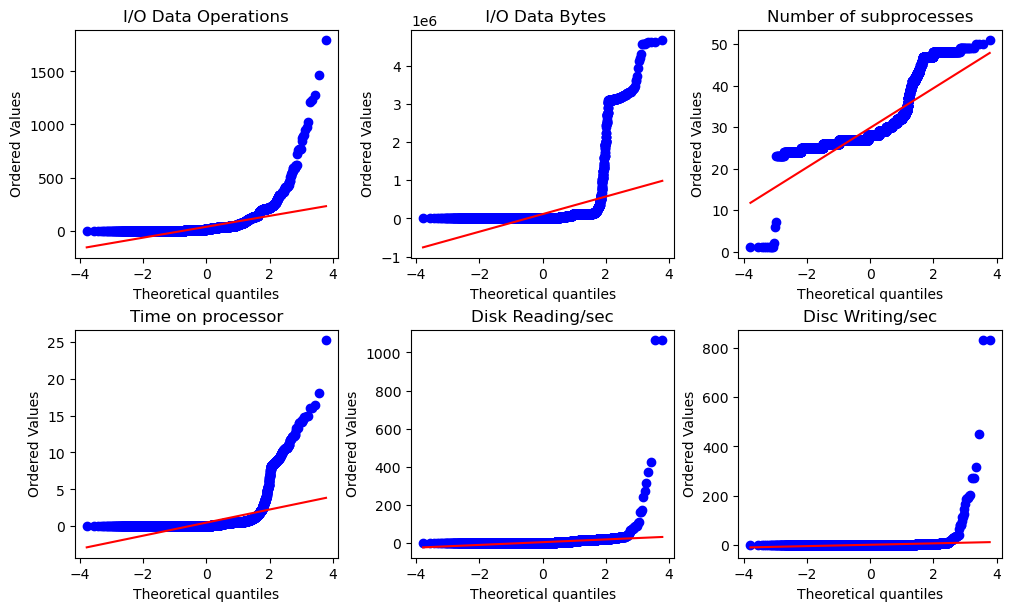

In [62]:
make_qqplot(data)

In [73]:
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer("box-cox", standardize=False)


In [72]:
data

,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius
0,114.798900,3790.450939,28.0,0.427078,6.162365,21.220403,58.492773,63.959387,0.621206,0.521813,24.624612,0.0,1001.533430,27.190843
1,14.154240,5182.451722,28.0,0.138876,5.399498,0.000000,22.886762,29.508369,0.422183,0.444403,0.044440,0.0,1089.121009,30.150941
2,0.044444,120.821253,28.0,0.000000,1.577765,0.000000,11.733239,12.888786,0.177776,0.155554,0.044444,0.0,322.464081,28.163287
3,31.369916,127228.251100,31.0,0.523750,15.981107,5.356671,602.125436,6976.986795,3.311801,5.756755,5.623394,0.0,12015.169690,34.204404
4,5.046181,1091.620117,25.0,0.069468,1.356022,0.000000,16.138887,13.271234,0.155609,0.133379,0.000000,0.0,550.989619,31.466889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8903,26.769658,6965.281426,25.0,0.155955,1.497184,0.000000,252.525113,589.072219,0.858386,0.758573,0.019962,0.0,1177.825039,30.875026
8904,0.000000,0.000000,27.0,0.000000,0.400009,0.000000,28.089513,27.267273,0.400009,0.355563,0.000000,0.0,221.249363,23.503856
8905,0.866827,853.957842,29.0,0.000000,4.378587,0.000000,20.559356,26.093712,0.333395,0.355621,0.022226,0.0,262.270699,21.060478
8906,0.044430,16.527885,28.0,0.000000,0.888596,0.000000,74.375484,116.650437,0.555372,0.377653,0.000000,0.0,268.222697,24.775056


In [78]:
from feature_engine.transformation import BoxCoxTransformer



## Performing Yeo-Johnson transformation

In [80]:
from sklearn.preprocessing import PowerTransformer 
from feature_engine.transformation import YeoJohnsonTransformer

In [81]:
transformer = PowerTransformer(method="yeo-johnson")

In [82]:
transformer.fit(data)

PowerTransformer()

In [83]:
X_tf = transformer.transform(data)